In [4]:
import pandas as pd
import numpy as np

In [5]:
!pwd

/content


In [6]:
%cd /content/sample_data

/content/sample_data


##veriyi yüklüyoruz

In [7]:
data=pd.read_excel("salary.xlsx")

In [10]:
data.head(3)

,deneyim,maas
0,7.1,98273
1,2.2,39891
2,9.5,116969


In [11]:
type(data)

pandas.core.frame.DataFrame

In [12]:
import torch
deneyim=torch.tensor(data['deneyim'],dtype=torch.float64)
maas=torch.tensor(data['maas'],dtype=torch.float64)

In [14]:
deneyim_egitim=deneyim[:20]
deneyim_test=deneyim[20:]

maas_egitim=maas[:20]
maas_test=maas[20:]

In [17]:
def model1(dene,w,b):
  return w*dene+b

In [18]:
def kayip_fonk(deneyimler,maaslar,w,b):
  t=0
  for i in range(len(deneyimler)):
    t+=(model1(deneyimler[i],w,b)-maaslar[i])**2
  return t/len(deneyimler)

In [19]:
def kismi_turev_w(deneyimler,maaslar,w,b):
  t=0
  for i in range(len(deneyimler)):
    t+=(model1(deneyimler[i],w,b)-maaslar[i])*deneyimler[i]
  return 2*t/len(deneyimler)


In [20]:
def kismi_turev_b(deneyimler,maaslar,w,b):
  t=0
  for i in range(len(deneyimler)):
    t+=(model1(deneyimler[i],w,b)-maaslar[i])
  return 2*t/len(deneyimler)

gradient descent ile w ve b'nin bulunmasi

In [52]:
#başlangic degerleri
w=1.0
b=22000.0
lr=0.0001

In [53]:
test_kayiplar=[]
egitim_kayiplar=[]
for epoch in range(500):
  w_yeni=w-lr*kismi_turev_w(deneyim_egitim,maas_egitim,w,b)
  b_yeni=b-lr*kismi_turev_b(deneyim_egitim,maas_egitim,w,b)

  w=w_yeni
  b=b_yeni
  test_kayip=kayip_fonk(deneyim_test,maas_test,w,b)
  egitim_kayip=kayip_fonk(deneyim_egitim,maas_egitim,w,b)

  test_kayiplar.append(test_kayip)
  egitim_kayiplar.append(egitim_kayip)


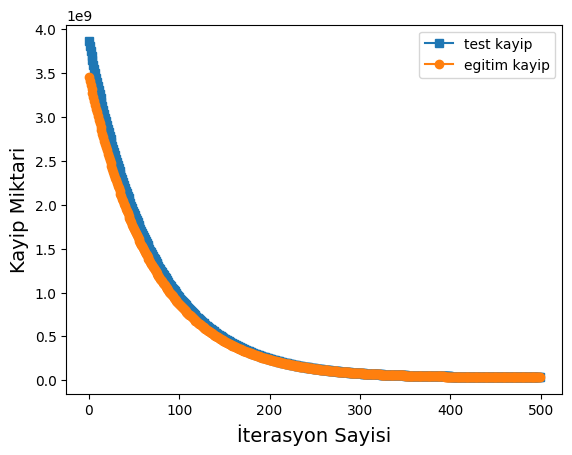

In [72]:
import matplotlib.pyplot as plt
plt.plot(range(500),test_kayiplar,label='test kayip',marker='s')
plt.plot(range(500),egitim_kayiplar,label='egitim kayip',marker='o')
plt.legend()
plt.xlabel('İterasyon Sayisi', fontsize=14)
plt.ylabel('Kayip Miktari', fontsize=14)
plt.show()


In [57]:
w.item()

9543.971722071878

In [58]:
b.item()

23495.791651906595

In [59]:
tahminler=w*deneyim_test+b
print(tahminler)

tensor([ 54036.5012,  54036.5012,  58808.4870,  80759.6220, 115117.9202,
        121798.7004, 106528.3456,  66443.6644,  42583.7351,  72170.0474],
       dtype=torch.float64)


In [60]:
print(maas_test)

tensor([ 54445.,  64445.,  57189.,  93940., 112635., 122391., 109431.,  61111.,
         43525.,  66029.], dtype=torch.float64)


##Türevlerin Pytorch'a aldirilmasi

In [70]:
parametreler=torch.tensor([1.0,22000.0],requires_grad=True)

In [64]:
model1(deneyim_test,*parametreler)

tensor([22003.2000, 22003.2000, 22003.7000, 22006.0000, 22009.6000, 22010.3000,
        22008.7000, 22004.5000, 22002.0000, 22005.1000], dtype=torch.float64,
       grad_fn=<AddBackward0>)

In [71]:
test_kayiplar=[]
egitim_kayiplar=[]
for epoch in range(500):
  egitim_kayip=kayip_fonk(deneyim_egitim,maas_egitim,*parametreler)
  egitim_kayip.backward() #türevleri hesaplamak icin --backward propagation

  with torch.no_grad():
    parametreler-=lr*parametreler.grad

  parametreler.grad.zero_()

  test_kayip=kayip_fonk(deneyim_test,maas_test,*parametreler)
  egitim_kayip=kayip_fonk(deneyim_egitim,maas_egitim,*parametreler)

  test_kayiplar.append(test_kayip.item())
  egitim_kayiplar.append(egitim_kayip.item())